In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/datasets/ml/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
df.corr(numeric_only=True)

,Mileage,Sell Price($),Age(yrs)
Mileage,1.000000,-0.927116,0.993452
Sell Price($),-0.927116,1.000000,-0.921741
Age(yrs),0.993452,-0.921741,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Car Model"]=le.fit_transform(df["Car Model"])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [8]:
df.corr()

,Car Model,Mileage,Sell Price($),Age(yrs)
Car Model,1.000000,0.074476,0.042081,0.061762
Mileage,0.074476,1.000000,-0.927116,0.993452
Sell Price($),0.042081,-0.927116,1.000000,-0.921741
Age(yrs),0.061762,0.993452,-0.921741,1.000000


<Axes: xlabel='Car Model', ylabel='Sell Price($)'>

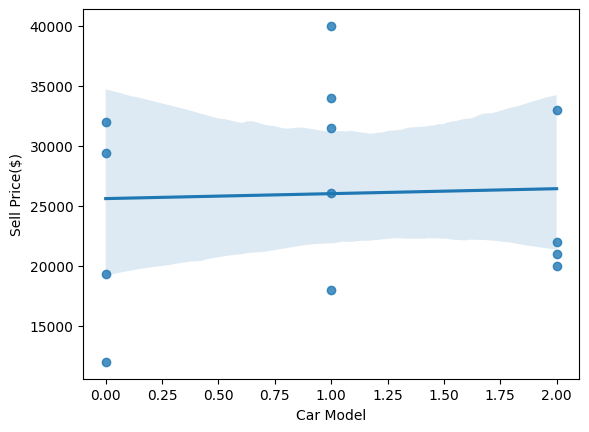

In [9]:
sns.regplot(x="Car Model",y="Sell Price($)",data=df)

<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

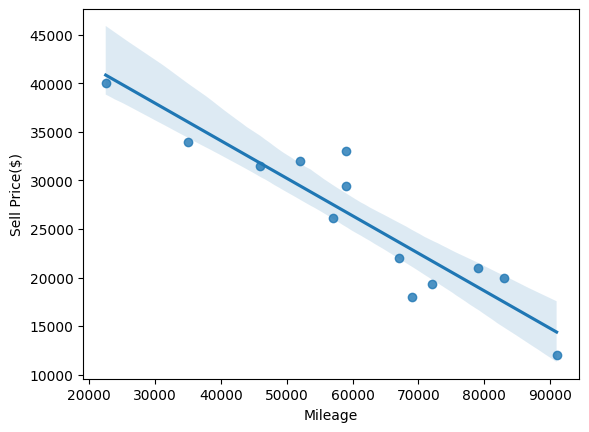

In [11]:
sns.regplot(x="Mileage",y="Sell Price($)",data=df)

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

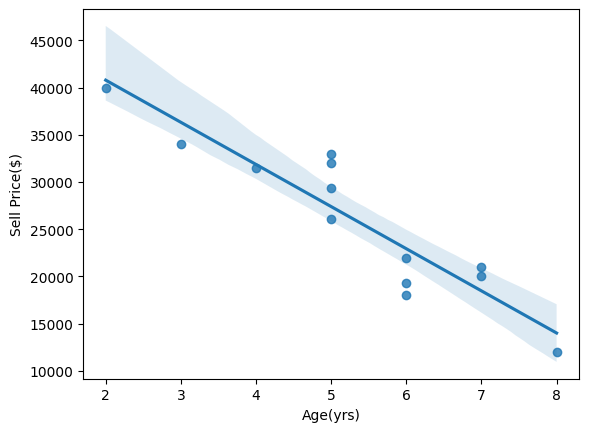

In [12]:
sns.regplot(x="Age(yrs)",y="Sell Price($)",data=df)

In [13]:
x=df.drop("Sell Price($)",axis=1)
y=df["Sell Price($)"]

In [16]:
x

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [17]:
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
x1=ohe.fit_transform(df[["Car Model"]])
x1

<13x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [21]:
x1=pd.DataFrame(x1.toarray())
x1

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [22]:
x1.drop(0,axis=1,inplace=True)
x1

,1,2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


In [23]:
x=pd.concat([x,x1],axis=1,ignore_index=True)
x

,0,1,2,3,4
0,1,69000,6,1.0,0.0
1,1,35000,3,1.0,0.0
2,1,57000,5,1.0,0.0
3,1,22500,2,1.0,0.0
4,1,46000,4,1.0,0.0
5,0,59000,5,0.0,0.0
6,0,52000,5,0.0,0.0
7,0,72000,6,0.0,0.0
8,0,91000,8,0.0,0.0
9,2,67000,6,0.0,1.0


In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [26]:
lr.predict([[45000,4,0,1]])

ValueError: X has 4 features, but LinearRegression is expecting 5 features as input.